### SVM Classification Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wisc_bc_ContinuousVar.csv', na_values = '?')

In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

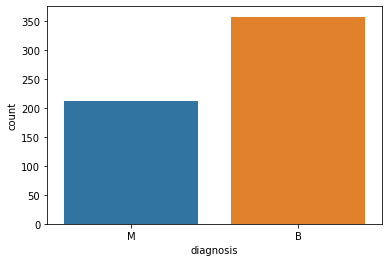

In [6]:
sns.countplot(x='diagnosis', data=data)

In [7]:
X = pd.DataFrame(data.drop(['diagnosis'], axis=1))
y = data['diagnosis']

In [8]:
#id has very low importance before and after scaling and intuitvely it is not relevant. hence deleting
X = X.loc[:,X.columns.drop(['id'])]

In [9]:
#applied labelencoder to classification column
Encoder = LabelEncoder()
y = Encoder.fit_transform(y) #Malignant = 1 and Benign = 0

In [10]:
#after scaling important feature observation
rf1 = RandomForestClassifier() 
rf1.fit(X, y)

RandomForestClassifier()

<AxesSubplot:>

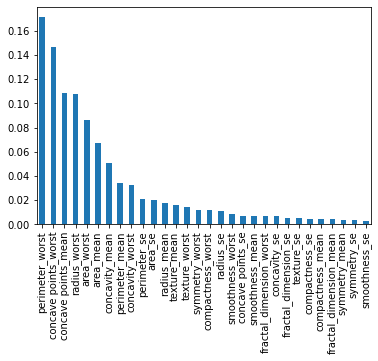

In [11]:
rf1.feature_importances_

feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')

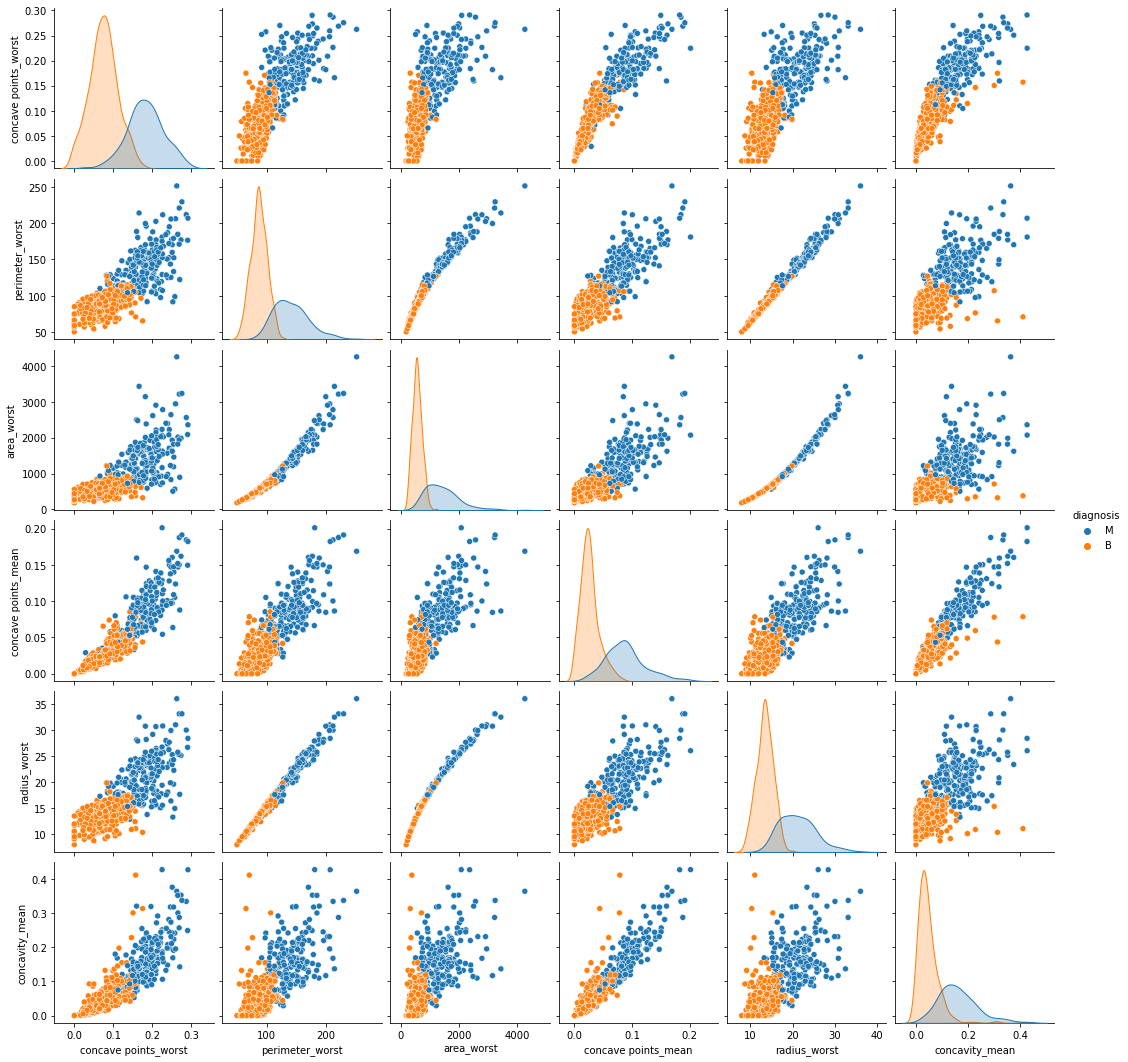

In [12]:
#first 6 important feature visualization.
sns.pairplot(data, hue='diagnosis', vars=['concave points_worst', 'perimeter_worst', 'area_worst', 'concave points_mean', 'radius_worst', 'concavity_mean'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
#scaling the continuous and higher values columns into reduced range
sc_feature = StandardScaler()
X_train = sc_feature.fit_transform(X_train.values)
X_test = sc_feature.transform(X_test.values)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [21]:
clf = SVC(kernel='linear', C=0.1) 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(C=0.1, kernel='linear')

In [22]:
y_pred = clf.predict(X_test)

In [24]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y_test, y_pred)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report of data after SVC applied: \n',classification_report(y_test, y_pred,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred),'\n\n') #TP,TN,FP,FN,


Accuracy Score is:  0.9883040935672515



classification_report of data after SVC applied: 
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       112
   Malignant       0.98      0.98      0.98        59

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171
 


Confusion Matrix of data predicted 
 [[111   1]
 [  1  58]] 




In [26]:
clf1 = SVC(kernel='linear', C=100.0)
clf1.fit(X_train, y_train)

SVC(C=100.0, kernel='linear')

In [28]:
y_pred1 = clf1.predict(X_test)

In [30]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y_test, y_pred1)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report of data after SVC applied: \n',classification_report(y_test, y_pred1,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred1),'\n\n') #TP,TN,FP,FN,

Accuracy Score is:  0.9590643274853801



classification_report of data after SVC applied: 
               precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       112
   Malignant       0.92      0.97      0.94        59

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171
 


Confusion Matrix of data predicted 
 [[107   5]
 [  2  57]] 




In [35]:
clf2 = SVC(kernel='linear', C=1000.0)
clf2.fit(X_train, y_train)

SVC(C=1000.0, kernel='linear')

In [36]:
y_pred2 = clf2.predict(X_test)

In [37]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y_test, y_pred2)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report of data after SVC applied: \n',classification_report(y_test, y_pred2,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred2),'\n\n') #TP,TN,FP,FN,

Accuracy Score is:  0.9590643274853801



classification_report of data after SVC applied: 
               precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       112
   Malignant       0.92      0.97      0.94        59

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171
 


Confusion Matrix of data predicted 
 [[107   5]
 [  2  57]] 




In [39]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9824
Test set score: 0.9883


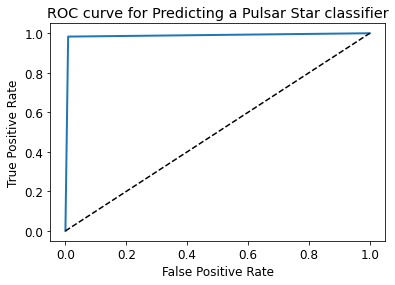

0.9870611380145279


In [45]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate') #(1 - Specificity)
plt.ylabel('True Positive Rate') #(Sensitivity)
plt.show()
ROC_AUC = roc_auc_score(y_test, y_pred)
print(ROC_AUC)

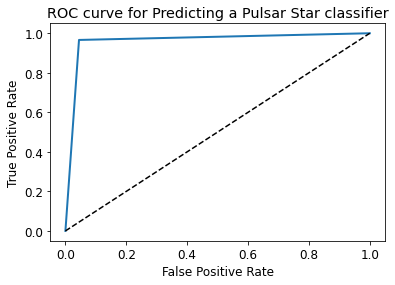

0.9607294188861987


In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate') #(1 - Specificity)
plt.ylabel('True Positive Rate') #(Sensitivity)
plt.show()
ROC_AUC1 = roc_auc_score(y_test, y_pred1)
print(ROC_AUC1) #c = 100 and 1000 has similar roc-curve and score.